# Notebook Overview

This notebook provides an exploratory data analysis (EDA) of the CryptoScamDB dataset. Below is an outline of the steps and analyses included:

1. **Load & Inspect Data**  
   Display the first few rows of the dataset to understand its structure.

2. **Missing Values Check**  
   Identify any missing or null values in the dataset.

3. **Category Analysis**  
   Count and visualize the distribution of scam categories.

4. **Reporter Analysis**  
   Examine the most active reporters contributing to the dataset.

5. **Address Analysis**  
   Analyze the total number of unique cryptocurrency addresses associated with each category.

6. **Description Analysis**  
   Generate a word cloud to highlight the most common words in scam descriptions.

7. **Subcategory Analysis**  
   Investigate the top subcategories within the most common scam categories.

This notebook provides clear visualizations and insights to help understand the structure and trends in scam-related data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/cryptoscamdb-scam-uris-and-details/uris.csv')
print(df.info())  
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         17 non-null     object
 1   url          17 non-null     object
 2   category     17 non-null     object
 3   subcategory  17 non-null     object
 4   description  17 non-null     object
 5   addresses    15 non-null     object
 6   reporter     17 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB
None
                                                name  \
0                             twitter.com/cz_binance   
1                           Twitter: EthereumWallets   
2                          twitter.com/VltalkButerin   
3  twitter.com/Aurora__dao/status/960683836463075328   
4                        twitter.com/VitalikButeriin   

                                                 url  category    subcategory  \
0                     https://twitter.com/cz_binance  Scamming  Tr

In [2]:
df.columns

Index(['name', 'url', 'category', 'subcategory', 'description', 'addresses',
       'reporter'],
      dtype='object')

### Check for Missing Values

name           0
url            0
category       0
subcategory    0
description    0
addresses      2
reporter       0
dtype: int64


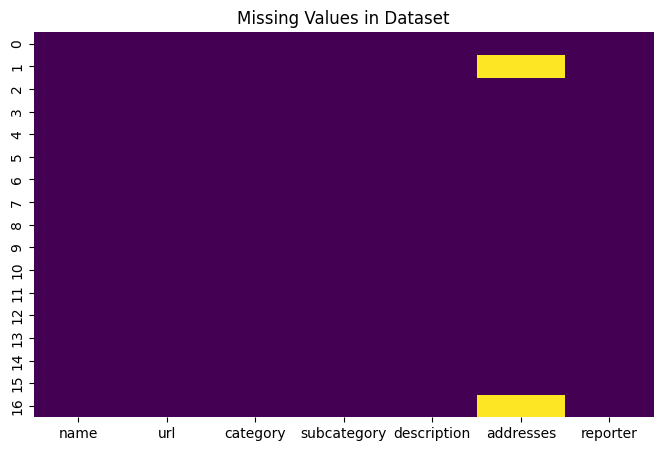

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()  # Counts missing values in each column
print(missing_values)

# Visualize missing data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Heatmap shows missing data visually
plt.title("Missing Values in Dataset")
plt.show()

## What are the most common scam categories?

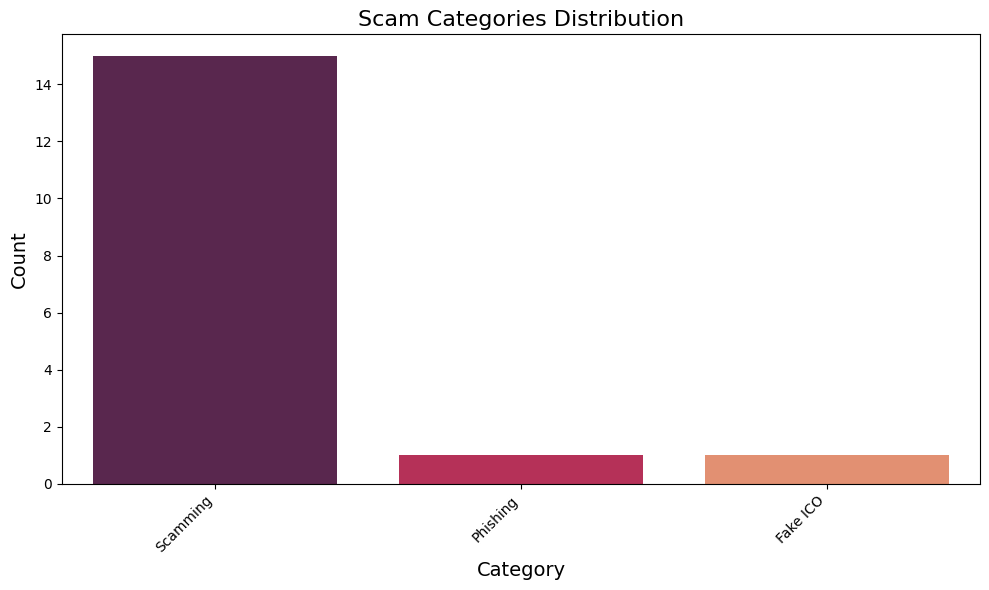

In [4]:
# Count the number of scams per category
category_counts = df['category'].value_counts()

# Visualize scam categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="rocket")
plt.title("Scam Categories Distribution", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Which subcategories are most common within each category?

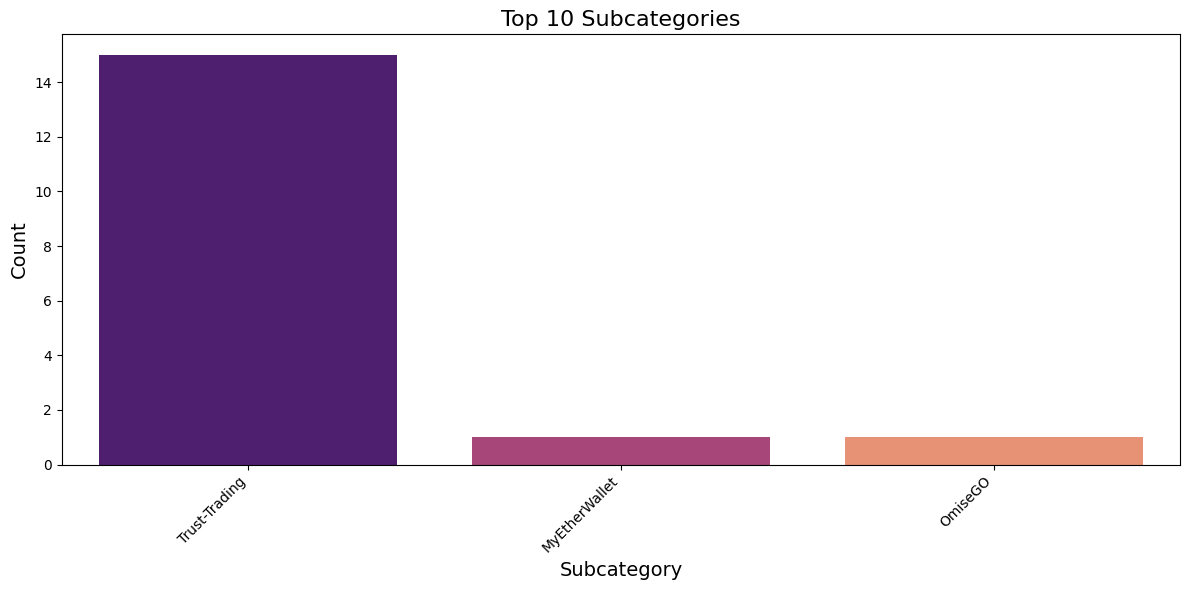

In [5]:
# Count subcategories
subcategory_counts = df['subcategory'].value_counts().head(10)  # Top 10 subcategories

# Visualize subcategories
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values, palette="magma")
plt.title("Top 10 Subcategories", fontsize=16)
plt.xlabel("Subcategory", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Which scam categories are linked to the highest number of unique addresses?

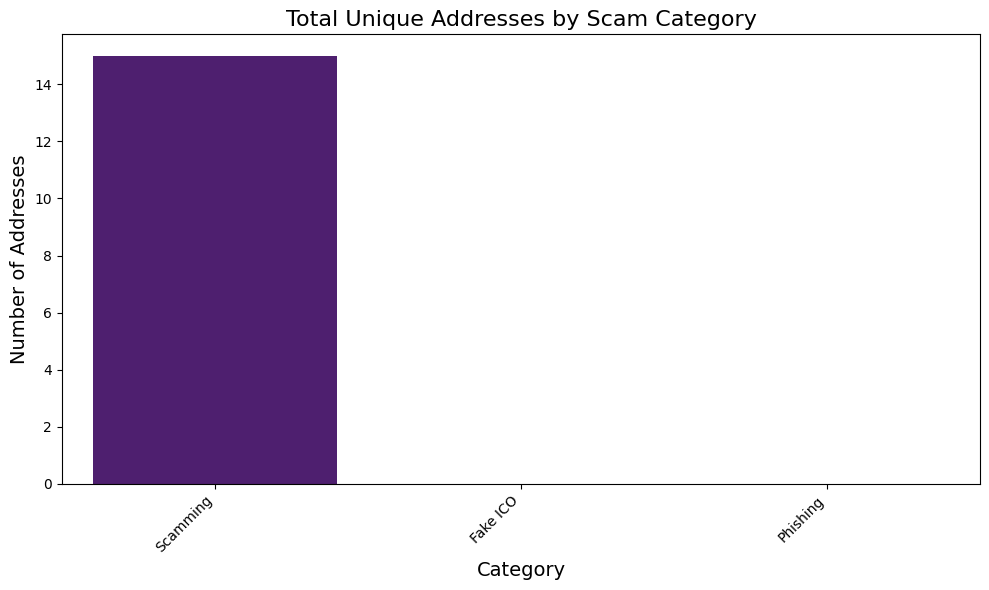

In [6]:
# Split the 'addresses' column into lists and count unique addresses for each category
df['address_list'] = df['addresses'].apply(lambda x: str(x).split(',') if pd.notna(x) else [])
df['address_count'] = df['address_list'].apply(len)  # Count number of addresses in each row

# Group by category and sum the address counts
category_address_counts = df.groupby('category')['address_count'].sum().sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=category_address_counts.index, y=category_address_counts.values, palette="magma")
plt.title("Total Unique Addresses by Scam Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Addresses", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Which reporters are the most active in submitting scam data?

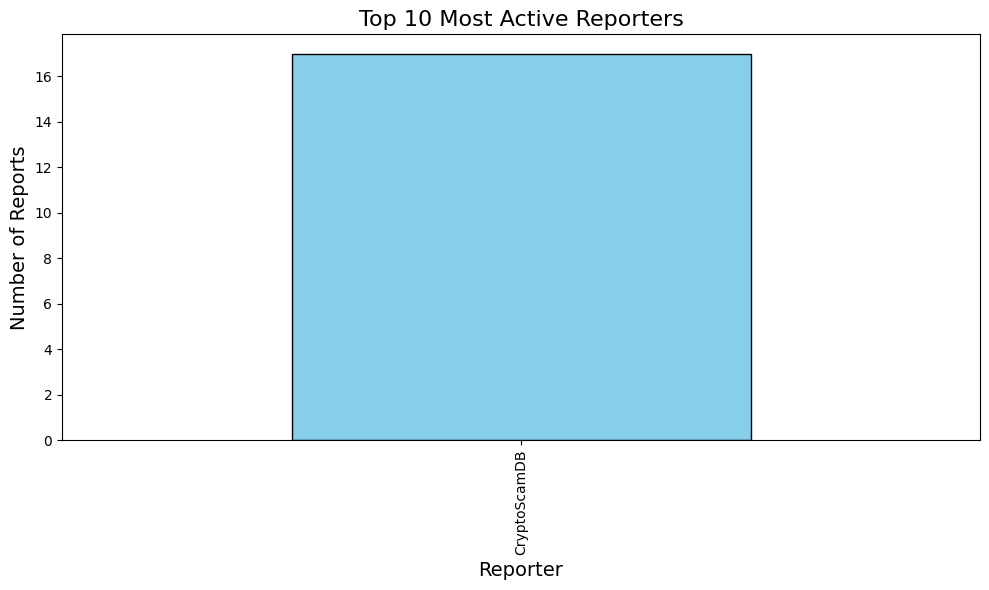

In [7]:
# Count the number of reports per reporter
reporter_counts = df['reporter'].value_counts()

# Plot the top 10 reporters
plt.figure(figsize=(10, 6))
reporter_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Most Active Reporters", fontsize=16)
plt.xlabel("Reporter", fontsize=14)
plt.ylabel("Number of Reports", fontsize=14)
plt.tight_layout()
plt.show()

## What subcategories are most common within the top 3 categories?

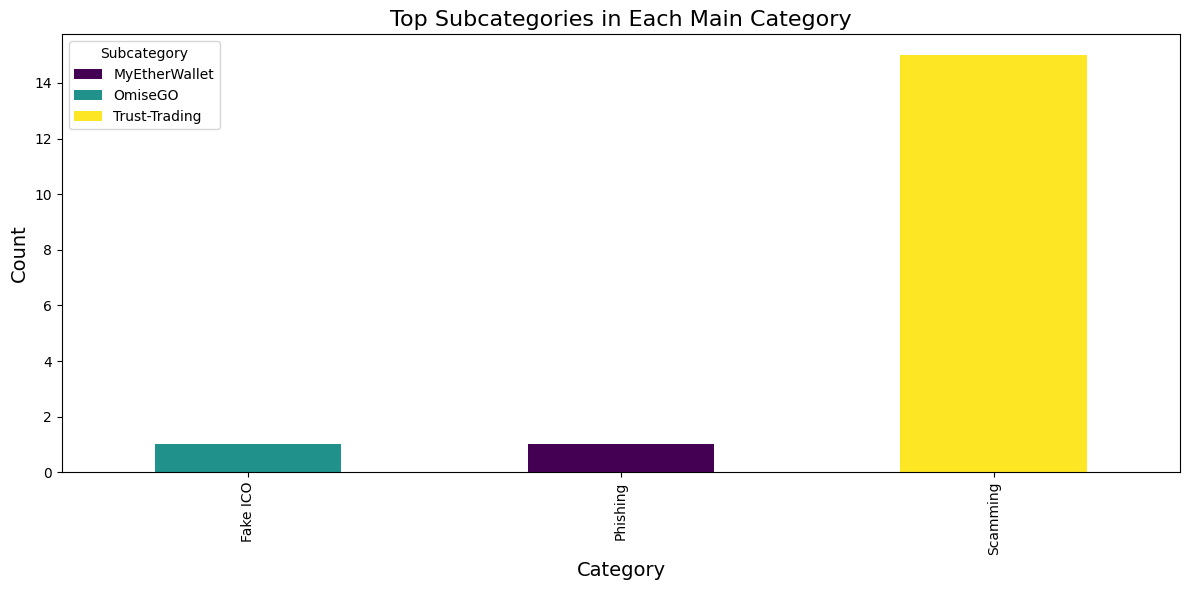

In [8]:
# Find the top 3 categories
top_categories = df['category'].value_counts().head(3).index

# Filter rows belonging to the top 3 categories
filtered_df = df[df['category'].isin(top_categories)]

# Count subcategories within each category
subcategory_counts = filtered_df.groupby('category')['subcategory'].value_counts().unstack().fillna(0)

# Plot a stacked bar chart
subcategory_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Top Subcategories in Each Main Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Subcategory")
plt.tight_layout()
plt.show()